Code used to test policies and define learning algorithms has been adapted from COMM055 Lab 10

In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 28.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import time, pickle, os
import gymnasium as gym
import matplotlib.pyplot as plt

# Taxi Environment

Defining test policies:

In [ ]:
# Test the optimal policy from Q-values

SUCCESS_REWARD = 20
def test_policy(env: gym.Env, policy: np.ndarray) -> None:
    """Tests a tabular policy on a given toy text environment.

    Args:
        env (gym.Env): the Gymnasium environment
        policy (np.ndarray): the tabular policy as a numPy array.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    steps = 0
    done = False
    state, _ = env.reset()
    total_reward = 0
    while not done:

        action = policy[state]

        next_state, reward, done, truncated, _ = env.step(int(action))
        total_reward += reward
        state = next_state
        steps += 1
        if done or truncated:
          break

    #print(f"{'Success' if reward == 20 else 'Failed'} in {steps} steps")
    return reward == SUCCESS_REWARD, total_reward

In [ ]:
#Test the final Q values still using an episilon greedy policy

SUCCESS_REWARD = 20
def test_policy_on(env: gym.Env, policy: np.ndarray) -> None:
    """Tests a tabular policy on a given toy text environment.

    Args:
        env (gym.Env): the Gymnasium environment
        policy (np.ndarray): the tabular policy as a numPy array.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    epsilon = 0.1
    steps = 0
    done = False
    state, _ = env.reset()
    total_reward = 0
    while not done:

        if np.random.uniform(0, 1) < epsilon:
        # With probability epsilon randomly select action
          action = env.action_space.sample()
        else:
        # With probability (1-epsilon) greedily select action
          action = np.argmax(Q[state])

        next_state, reward, done, truncated, _ = env.step(int(action))
        total_reward += reward
        state = next_state
        steps += 1
        if done or truncated:
          break

    #print(f"{'Success' if reward == 20 else 'Failed'} in {steps} steps")
    return reward == SUCCESS_REWARD, total_reward

## Hyper-parameter Tuning for Q-learning



Training success rate:  0.9624
Test success rate: 1.0
Test average reward: 7.949
Training success rate:  0.9628
Test success rate: 1.0
Test average reward: 7.911
Training success rate:  0.9662
Test success rate: 1.0
Test average reward: 7.888
Training success rate:  0.9656
Test success rate: 1.0
Test average reward: 7.813
Training success rate:  0.9642
Test success rate: 1.0
Test average reward: 7.829
Training success rate:  0.966
Test success rate: 1.0
Test average reward: 7.911


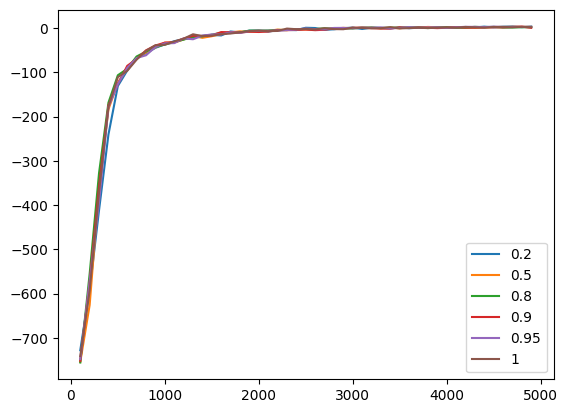

Training success rate:  0.946
Test success rate: 1.0
Test average reward: 7.903
Training success rate:  0.9616
Test success rate: 1.0
Test average reward: 7.789
Training success rate:  0.965
Test success rate: 1.0
Test average reward: 7.932
Training success rate:  0.9622
Test success rate: 1.0
Test average reward: 7.996
Training success rate:  0.9672
Test success rate: 1.0
Test average reward: 8.022


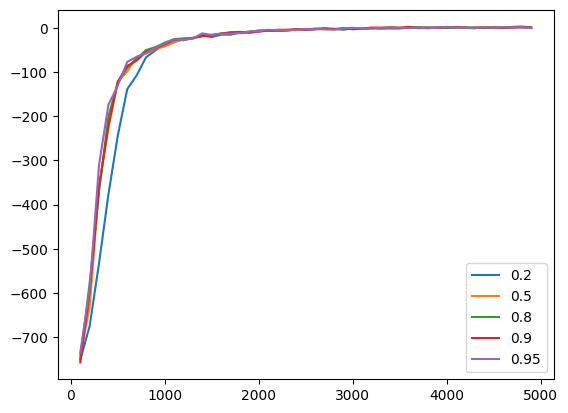

Training success rate:  0.7838
Test success rate: 1.0
Test average reward: 8.094
Training success rate:  0.9666
Test success rate: 1.0
Test average reward: 8.085
Training success rate:  0.9848
Test success rate: 1.0
Test average reward: 7.928
Training success rate:  0.9918
Test success rate: 1.0
Test average reward: 7.844


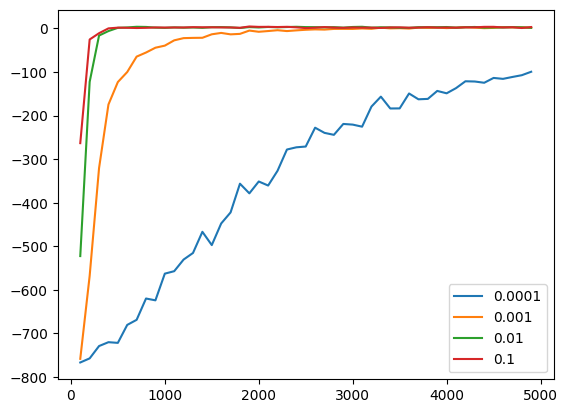

In [ ]:
TAXI = "Taxi-v3"
# 20 for Taxi-v3
SUCCESS_REWARD = 20

#Q_moving_avg_S = []
Q_R_convergence = []
def Q_learning( env: gym.Env, epsilon_decay=0.001, step_size: float = 0.9, episodes: int = 5_000, gamma: float = 0.95) -> np.ndarray:
    Q_moving_avg_S = []
    Q_moving_avg_R = []
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    success_tracker = 0
    reward_tracker = 0
    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward

            # Just keeps track of successful episodes (OPTIONAL)
            if reward == SUCCESS_REWARD and done == True:
                success_episodes += 1
                success_tracker += 1

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                reward_tracker += total_R
                break
        if i%100==0 and not i==0:
          #print("Percentage of last 100 successful: ", success_tracker/100)
          #print("Average reward of last 100: ", reward_tracker/100)
          Q_moving_avg_S.append(success_tracker/100)
          Q_moving_avg_R.append(reward_tracker/100)
          success_tracker = 0
          reward_tracker = 0
          #print("Epsilon: ", epsilon)
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i,decay_rate=epsilon_decay)

        # Print results
        # print(
        #     f"Episode {i}: ||  Total Reward: {total_R} || e-greedy: {epsilon} || Success Rate: {success_episodes}/{i+1}"
        # )
    print("Training success rate: ", success_episodes/ episodes)
    Q_R_convergence.append(Q_moving_avg_R)
    return Q


def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy


#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make(TAXI)



gammas = [0.2,0.5,0.8,0.9,0.95,1]

for g in gammas:
  Q = Q_learning(env, gamma=g)  # Get Q value
  opt_p = determine_policy_from_Q(Q)  # Get policy from  Q
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1
  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")
x=np.arange(100, 5000, 100)
for i in Q_R_convergence:
  plt.plot(x, i)

plt.legend(gammas)
plt.show()

Q_R_convergence = []
step_sizes = [0.2,0.5,0.8,0.9,0.95]

for size in step_sizes:
  Q = Q_learning(env, step_size=size)  # Get Q value
  opt_p = determine_policy_from_Q(Q)  # Get policy from  Q
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1
  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")
x=np.arange(100, 5000, 100)
for i in Q_R_convergence:
  plt.plot(x, i)

plt.legend(step_sizes)
plt.show()

Q_R_convergence = []
epsilon_decays = [0.0001,0.001,0.01,0.1]

for e in epsilon_decays:
  Q = Q_learning(env, epsilon_decay=e)  # Get Q value
  opt_p = determine_policy_from_Q(Q)
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1

  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")

x=np.arange(100, 5000, 100)
for i in Q_R_convergence:
  plt.plot(x, i)

plt.legend(epsilon_decays)
plt.show()


env.close()

## Hyperparameter tuning for Sarsa

Training success rate:  0.2862
Test success rate: 0.181
Test average reward: -162.295
Training success rate:  0.396
Test success rate: 0.468
Test average reward: -102.945
Training success rate:  0.735
Test success rate: 0.768
Test average reward: -40.201
Training success rate:  0.866
Test success rate: 0.978
Test average reward: 3.252
Training success rate:  0.8808
Test success rate: 0.996
Test average reward: 7.052
Training success rate:  0.8976
Test success rate: 0.977
Test average reward: 3.157


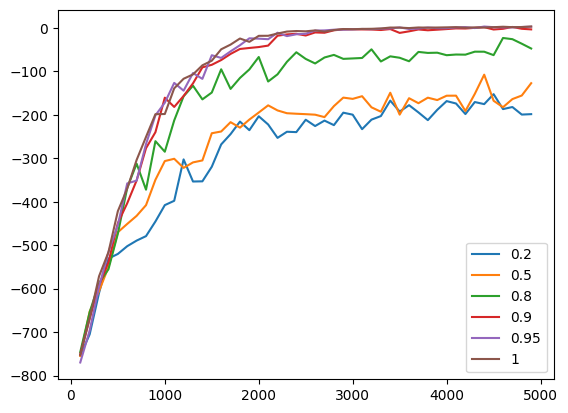

Training success rate:  0.8846
Test success rate: 1.0
Test average reward: 7.8
Training success rate:  0.9074
Test success rate: 1.0
Test average reward: 7.706
Training success rate:  0.9098
Test success rate: 1.0
Test average reward: 7.776
Training success rate:  0.8898
Test success rate: 0.76
Test average reward: -42.054
Training success rate:  0.8482
Test success rate: 0.441
Test average reward: -108.435
Training success rate:  0.509
Test success rate: 0.354
Test average reward: -178.003


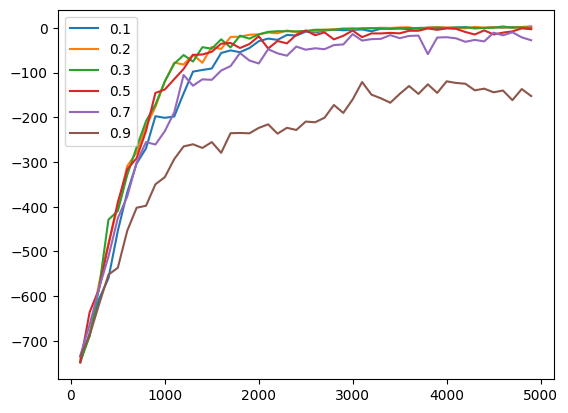

Training success rate:  0.5836
Test success rate: 0.521
Test average reward: -91.074
Training success rate:  0.8852
Test success rate: 0.992
Test average reward: 5.961
Training success rate:  0.957
Test success rate: 0.973
Test average reward: 2.261
Training success rate:  0.9622
Test success rate: 0.964
Test average reward: 0.638


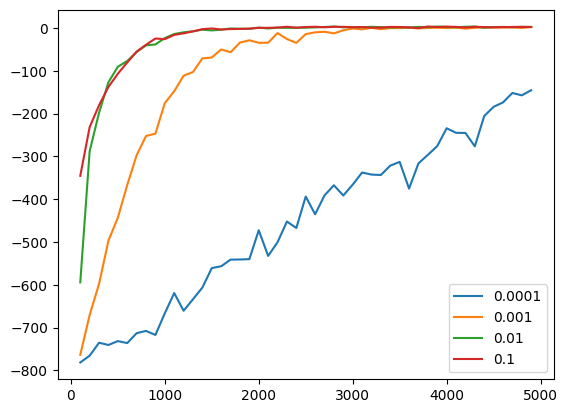

[0. 4. 4. 4. 0. 0. 3. 2. 0. 0. 0. 0. 0. 2. 1. 0. 5. 2. 0. 0. 0. 3. 3. 3.
 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 2.
 0. 0. 0. 0. 1. 2. 2. 0. 0. 2. 0. 2. 0. 0. 3. 0. 2. 0. 2. 2. 0. 0. 0. 3.
 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 3. 1. 4. 0. 4. 4. 0. 2. 0. 3. 3. 3. 3. 0.
 0. 5. 0. 3. 0. 1. 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 0. 1. 2. 0. 2.
 0. 1. 3. 1. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 2. 2. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 0. 3. 3. 3. 1. 0. 2. 2.
 3. 0. 0. 3. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 1. 1. 3. 3. 0. 3.
 0. 3. 0. 0. 3. 1. 0. 0. 0. 1. 1. 1. 2. 0. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0.
 1. 2. 0. 2. 0. 3. 3. 3. 2. 0. 2. 2. 3. 3. 0. 3. 2. 2. 2. 0. 1. 2. 3. 2.
 0. 3. 3. 3. 1. 0. 2. 1. 3. 3. 0. 3. 2. 2. 2. 0. 3. 2. 3. 2. 0. 3. 3. 3.
 1. 0. 1. 2. 3. 3. 0. 3. 0. 0. 0. 0. 3. 2. 3. 0. 0. 3. 3. 3. 1. 0. 1. 1.
 3. 3. 0. 3. 3. 0. 3. 0. 3. 1. 3. 3. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 3. 0. 1. 1. 1.

In [ ]:
#using SARSA

TAXI = "Taxi-v3"
# 20 for Taxi-v3
SUCCESS_REWARD = 20

#Sarsa_moving_avg_S = []
Sarsa_R_convergence = []

def Sarsa_learning(env: gym.Env, epsilon_decay=0.001, step_size: float = 0.1, episodes: int = 5_000, gamma: float = 0.95) -> np.ndarray:
    Sarsa_moving_avg_S = []
    Sarsa_moving_avg_R = []    
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    success_tracker = 0
    reward_tracker = 0

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                next_action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                next_action = np.argmax(Q[next_state])
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward

            # Just keeps track of successful episodes (OPTIONAL)
            if reward == SUCCESS_REWARD and done == True:
                success_episodes += 1
                success_tracker += 1

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                reward_tracker += total_R
                break
        if i%100==0 and not i ==0:
          #print("Percentage of last 100 successful: ", success_tracker/100)
          #print("Average reward of last 100: ", reward_tracker/100)
          Sarsa_moving_avg_S.append(success_tracker/100)
          Sarsa_moving_avg_R.append(reward_tracker/100)
          success_tracker = 0
          reward_tracker = 0
          #print("Epsilon: ", epsilon)
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i,decay_rate=epsilon_decay)

        # Print results
        # print(
        #     f"Episode {i}: ||  Total Reward: {total_R} || e-greedy: {epsilon} || Success Rate: {success_episodes}/{i+1}"
        # )
    print("Training success rate: ", success_episodes/ episodes)
    Sarsa_R_convergence.append(Sarsa_moving_avg_R)
    return Q


def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy


#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make(TAXI)

gammas = [0.2,0.5,0.8,0.9,0.95,1]

for g in gammas:
  Q = Sarsa_learning(env, gamma=g)  # Get Q value
  opt_p = determine_policy_from_Q(Q)  # Get policy from  Q
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1
  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")
x=np.arange(100, 5000, 100)
for i in Sarsa_R_convergence:
  plt.plot(x, i)

plt.legend(gammas)
plt.show()

Sarsa_R_convergence = []
step_sizes = [0.1,0.2,0.3,0.5,0.7,0.9]

for size in step_sizes:
  Q = Sarsa_learning(env, step_size=size)  # Get Q value
  opt_p = determine_policy_from_Q(Q)  # Get policy from  Q
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1
  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")
x=np.arange(100, 5000, 100)
for i in Sarsa_R_convergence:
  plt.plot(x, i)

plt.legend(step_sizes)
plt.show()

Sarsa_R_convergence = []
epsilon_decays = [0.0001,0.001,0.01,0.1]

for e in epsilon_decays:
  Q = Sarsa_learning(env, epsilon_decay=e)  # Get Q value
  opt_p = determine_policy_from_Q(Q)
  successes = 0
  n_runs = 1_000
  total_reward = 0
  for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    if success:
        successes += 1

  print(f"Test success rate: {successes / n_runs}")
  print(f"Test average reward: {total_reward / n_runs}")

x=np.arange(100, 5000, 100)
for i in Sarsa_R_convergence:
  plt.plot(x, i)

plt.legend(epsilon_decays)
plt.show()

print(opt_p)

env.close()

# Comparing optimal hyperparameters for both algorithms

In [ ]:
#using Q learning

FROZEN_LAKE = "FrozenLake-v1"
TAXI = "Taxi-v3"
# 20 for Taxi-v3
# 1 for FrozenLake-v1
SUCCESS_REWARD = 20

Q_moving_avg_S = []
Q_moving_avg_R = []
def Q_learning(env: gym.Env, step_size: float = 0.9, episodes: int = 5_000, gamma: float = 0.95) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    success_tracker = 0
    reward_tracker = 0
    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward

            # Just keeps track of successful episodes (OPTIONAL)
            if reward == SUCCESS_REWARD and done == True:
                success_episodes += 1
                success_tracker += 1

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                reward_tracker += total_R
                break
        if i%100==0 and not i==0:
          print("Percentage of last 100 successful: ", success_tracker/100)
          print("Average reward of last 100: ", reward_tracker/100)
          Q_moving_avg_S.append(success_tracker/100)
          Q_moving_avg_R.append(reward_tracker/100)
          success_tracker = 0
          reward_tracker = 0
          print("Epsilon: ", epsilon)
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i)

        # Print results
        # print(
        #     f"Episode {i}: ||  Total Reward: {total_R} || e-greedy: {epsilon} || Success Rate: {success_episodes}/{i+1}"
        # )
    print("Training success rate: ", success_episodes/ episodes)
    return Q


def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.1) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy


#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make(TAXI)
Q = Q_learning(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

successes = 0
n_runs = 1_000
total_reward = 0
rewards= []
for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    rewards.append(reward)
    if success:
        successes += 1

print(f"Test success rate: {successes / n_runs}")
print(f"Test average reward: {total_reward / n_runs}")
print(f"Test average reward standard error: {np.std(rewards)/np.sqrt(n_runs)}")
# print("Testing with same policy as training")
# successes = 0
# n_runs = 10_000
# total_reward = 0
# rewards= []
# for _ in range(n_runs):  # Test the policy n_runs times
#     success, reward = test_policy_on(env, opt_p)  # Test the policy on your environment.
#     total_reward += reward
#     rewards.append(reward)
#     if success:
#         successes += 1

# print(f"Test success rate: {successes / n_runs}")
# print(f"Test average reward: {total_reward / n_runs}")
# print(f"Test avaerage reward standard error: {np.std(rewards)/np.sqrt(n_runs)}")
# print(opt_p)

env.close()

Percentage of last 100 successful:  0.59
Average reward of last 100:  -270.23
Epsilon:  0.10004515721385056
Percentage of last 100 successful:  1.0
Average reward of last 100:  -38.33
Epsilon:  0.10000000205013435
Percentage of last 100 successful:  1.0
Average reward of last 100:  -6.22
Epsilon:  0.10000000000009308
Percentage of last 100 successful:  1.0
Average reward of last 100:  -1.78
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  1.55
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  2.19
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  2.35
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  1.8
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  1.6
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100:  1.87
Epsilon:  0.1
Percentage of last 100 successful:  1.0
Average reward of last 100

In [ ]:
#using SARSA

FROZEN_LAKE = "FrozenLake-v1"
TAXI = "Taxi-v3"
# 20 for Taxi-v3
# 1 for FrozenLake-v1
SUCCESS_REWARD = 20

Sarsa_moving_avg_S = []
Sarsa_moving_avg_R = []

def Q_learning(env: gym.Env, step_size: float = 0.2, episodes: int = 5_000, gamma: float = 1) -> np.ndarray:
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = 1.0  # Initial epsilon value
    success_episodes = 0
    success_tracker = 0
    reward_tracker = 0

    for i in range(episodes):
        state, _ = env.reset()  # Reset environment for every new episode
        total_R = 0  # Reward count for each episode (OPTIONAL)

        while True:  # Until the episode ends
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                action = np.argmax(Q[state])

            # Perform selected action on the environment and check next_state
            next_state, reward, done, truncated, _ = env.step(action)
            if np.random.uniform(0, 1) < epsilon:
                # With probability epsilon randomly select action
                next_action = env.action_space.sample()
            else:
                # With probability (1-epsilon) greedily select action
                next_action = np.argmax(Q[next_state])
            # Just keeps track of environment rewards (OPTIONAL)
            total_R += reward

            # Just keeps track of successful episodes (OPTIONAL)
            if reward == SUCCESS_REWARD and done == True:
                success_episodes += 1
                success_tracker += 1

            # Perform Q learning update:
            # Q(s,a) \leftarrow Q(s,a) +  step_size * [R + \gamma * \max_a Q(s',a) -  Q(s,a) ]
            Q[state][action] += step_size * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            # Assign new current state
            state = next_state

            # If episode has terminated, restart
            if done or truncated:
                reward_tracker += total_R
                break
        if i%100==0 and not i ==0:
          print("Percentage of last 100 successful: ", success_tracker/100)
          print("Average reward of last 100: ", reward_tracker/100)
          Sarsa_moving_avg_S.append(success_tracker/100)
          Sarsa_moving_avg_R.append(reward_tracker/100)
          success_tracker = 0
          reward_tracker = 0
          print("Epsilon: ", epsilon)
        # Decay epsilon to increase probability of exploitation (OPTIONAL). E-greedy with constant epsilon is also fine.
        epsilon = decay_epsilon(i)

        # Print results
        # print(
        #     f"Episode {i}: ||  Total Reward: {total_R} || e-greedy: {epsilon} || Success Rate: {success_episodes}/{i+1}"
        # )
    print("Training success rate: ", success_episodes/ episodes)
    return Q


def decay_epsilon(episode: int, max_epsilon: float = 1.0, min_epsilon: float = 0.1, decay_rate: float = 0.001) -> float:
    # Exponential decay of epsilon based on ep number
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    return epsilon


def determine_policy_from_Q(Q: np.ndarray) -> np.ndarray:
    # Build policy from Q function  by \pi(state) = \argmax_a Q(state,  a) for every state.
    policy = np.zeros(Q.shape[0])
    for s in range(Q.shape[0]):
        policy[s] = np.argmax(Q[s])
    return policy


#env = gym.make("FrozenLake-v1", is_slippery=True)  # Select environment
env = gym.make(TAXI)
Q = Q_learning(env)  # Get Q value
opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

successes = 0
n_runs = 1_000
total_reward = 0
rewards= []
for _ in range(n_runs):  # Test the policy n_runs times
    success, reward = test_policy(env, opt_p)  # Test the policy on your environment.
    total_reward += reward
    rewards.append(reward)
    if success:
        successes += 1

print(f"Test success rate: {successes / n_runs}")
print(f"Test average reward: {total_reward / n_runs}")
print(f"Test average reward standard error: {np.std(rewards)/np.sqrt(n_runs)}")

# print("Testing with same policy as training")
# successes = 0
# n_runs = 10_000
# total_reward = 0
# for _ in range(n_runs):  # Test the policy n_runs times
#     success, reward = test_policy_on(env, opt_p)  # Test the policy on your environment.
#     total_reward += reward
#     if success:
#         successes += 1

# print(f"Test success rate: {successes / n_runs}")
# print(f"Test average reward: {total_reward / n_runs}")
# print(opt_p)

env.close()

Percentage of last 100 successful:  0.08
Average reward of last 100:  -731.92
Epsilon:  0.9151684372211937
Percentage of last 100 successful:  0.06
Average reward of last 100:  -686.39
Epsilon:  0.837594903999633
Percentage of last 100 successful:  0.35
Average reward of last 100:  -551.81
Epsilon:  0.7674034684915094
Percentage of last 100 successful:  0.48
Average reward of last 100:  -470.02
Epsilon:  0.7038916312181013
Percentage of last 100 successful:  0.65
Average reward of last 100:  -366.42
Epsilon:  0.6464237443649107
Percentage of last 100 successful:  0.72
Average reward of last 100:  -291.17
Epsilon:  0.594424650004687
Percentage of last 100 successful:  0.82
Average reward of last 100:  -252.16
Epsilon:  0.547373923723574
Percentage of last 100 successful:  0.89
Average reward of last 100:  -193.02
Epsilon:  0.504800666038655
Percentage of last 100 successful:  0.98
Average reward of last 100:  -108.78
Epsilon:  0.46627878947765333
Percentage of last 100 successful:  0.97

## Plots to compare Q-learning and Sarsa

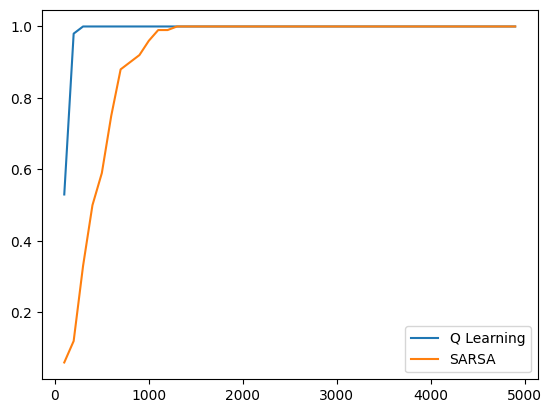

In [ ]:
x=np.arange(100, 5000, 100)

plt.plot(x, Q_moving_avg_S)
plt.plot(x, Sarsa_moving_avg_S)
plt.legend(["Q Learning", "SARSA"])
plt.show()

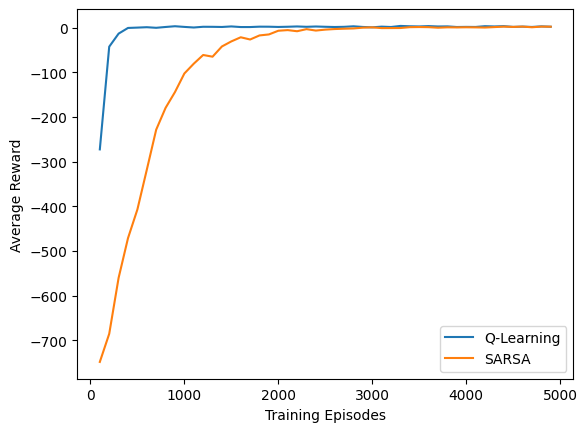

In [ ]:
x=np.arange(100, 5000, 100)

plt.plot(x, Q_moving_avg_R)
plt.plot(x, Sarsa_moving_avg_R)
plt.ylabel("Average Reward")
plt.xlabel("Training Episodes")
plt.legend(["Q-Learning", "SARSA"])
plt.show()